<a href="https://colab.research.google.com/github/Rajeshprd/Olympic-Dataset/blob/main/Olympic_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Importing libraries**

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

#**Importing the winter Dataset**

In [3]:
winter = pd.read_csv("/content/winter.csv")

#**Importing the summer Dataset**

In [7]:
summer = pd.read_csv("/content/summer.csv")

In [8]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1896,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold
1,1896,Athens,Aquatics,Swimming,"HERSCHMANN, Otto",AUT,Men,100M Freestyle,Silver
2,1896,Athens,Aquatics,Swimming,"DRIVAS, Dimitrios",GRE,Men,100M Freestyle For Sailors,Bronze
3,1896,Athens,Aquatics,Swimming,"MALOKINIS, Ioannis",GRE,Men,100M Freestyle For Sailors,Gold
4,1896,Athens,Aquatics,Swimming,"CHASAPIS, Spiridon",GRE,Men,100M Freestyle For Sailors,Silver


In [9]:
summer.tail()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
31160,2012,London,Wrestling,Wrestling Freestyle,"JANIKOWSKI, Damian",POL,Men,Wg 84 KG,Bronze
31161,2012,London,Wrestling,Wrestling Freestyle,"REZAEI, Ghasem Gholamreza",IRI,Men,Wg 96 KG,Gold
31162,2012,London,Wrestling,Wrestling Freestyle,"TOTROV, Rustam",RUS,Men,Wg 96 KG,Silver
31163,2012,London,Wrestling,Wrestling Freestyle,"ALEKSANYAN, Artur",ARM,Men,Wg 96 KG,Bronze
31164,2012,London,Wrestling,Wrestling Freestyle,"LIDBERG, Jimmy",SWE,Men,Wg 96 KG,Bronze


#**Importing the dictionary Dataset**

In [10]:
dict = pd.read_csv("/content/dictionary.csv")

In [11]:
dict.head()

,Country,Code,Population,GDP per Capita
0,Afghanistan,AFG,32526562.0,594.323081
1,Albania,ALB,2889167.0,3945.217582
2,Algeria,ALG,39666519.0,4206.031232
3,American Samoa*,ASA,55538.0,NaN
4,Andorra,AND,70473.0,NaN


In [12]:
dict.tail()

,Country,Code,Population,GDP per Capita
196,Vietnam,VIE,91703800.0,2111.138024
197,Virgin Islands*,ISV,103574.0,NaN
198,Yemen,YEM,26832215.0,1406.291651
199,Zambia,ZAM,16211767.0,1304.879014
200,Zimbabwe,ZIM,15602751.0,924.143819


#**Analyzing the Winter Data**

In [13]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
0,1924,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze
1,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze
2,1924,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze
3,1924,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze
4,1924,Chamonix,Biathlon,Biathlon,"AUFDENBLATTEN, Adolf",SUI,Men,Military Patrol,Gold


In [14]:
winter.tail()

,Year,City,Sport,Discipline,Athlete,Country,Gender,Event,Medal
5765,2014,Sochi,Skiing,Snowboard,"JONES, Jenny",GBR,Women,Slopestyle,Bronze
5766,2014,Sochi,Skiing,Snowboard,"ANDERSON, Jamie",USA,Women,Slopestyle,Gold
5767,2014,Sochi,Skiing,Snowboard,"MALTAIS, Dominique",CAN,Women,Snowboard Cross,Silver
5768,2014,Sochi,Skiing,Snowboard,"SAMKOVA, Eva",CZE,Women,Snowboard Cross,Gold
5769,2014,Sochi,Skiing,Snowboard,"TRESPEUCH, Chloe",FRA,Women,Snowboard Cross,Bronze


In [15]:
winter.rename(columns={'Country':'Code'}, inplace=True) # Rename the column country into code

In [16]:
winter = pd.merge(winter, dict, on='Code', how='outer')

In [17]:
winter.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita
0,1924.0,Chamonix,Biathlon,Biathlon,"BERTHET, G.",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102
1,1924.0,Chamonix,Biathlon,Biathlon,"MANDRILLON, C.",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102
2,1924.0,Chamonix,Biathlon,Biathlon,"MANDRILLON, Maurice",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102
3,1924.0,Chamonix,Biathlon,Biathlon,"VANDELLE, André",FRA,Men,Military Patrol,Bronze,France,66808385.0,36205.568102
4,1924.0,Chamonix,Curling,Curling,"ALDEERT, H.",FRA,Men,Curling,Bronze,France,66808385.0,36205.568102


In [18]:
winter.describe(include='all')

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita
count,5770.000000,5770,5770,5770,5770,5934,5770,5770,5770,4990,4.985000e+03,4956.000000
unique,NaN,19,7,15,3761,209,2,83,3,201,NaN,NaN
top,NaN,Sochi,Skiing,Ice Hockey,"BJOERNDALEN, Ole Einar",USA,Men,Ice Hockey,Silver,United States,NaN,NaN
freq,NaN,612,1781,1536,13,653,3944,1536,1930,653,NaN,NaN
mean,1986.350433,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.536055e+07,44738.744452
std,24.263673,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.953490e+08,19271.499099
min,1924.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.022200e+04,277.068309
25%,1972.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.286976e+06,41313.313995
50%,1994.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.585177e+07,43248.529909
75%,2006.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.141314e+07,56115.718426


In [19]:
winter.nunique()

Year                22
City                19
Sport                7
Discipline          15
Athlete           3761
Code               209
Gender               2
Event               83
Medal                3
Country            201
Population         196
GDP per Capita     176
dtype: int64

In [20]:
winter.describe(include='O')

,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country
count,5770,5770,5770,5770,5934,5770,5770,5770,4990
unique,19,7,15,3761,209,2,83,3,201
top,Sochi,Skiing,Ice Hockey,"BJOERNDALEN, Ole Einar",USA,Men,Ice Hockey,Silver,United States
freq,612,1781,1536,13,653,3944,1536,1930,653


#**Who won the most medals**

In [35]:
medals = winter.groupby(['Athlete', 'Medal'])['Sport'].count().reset_index().sort_values(by='Sport', ascending=False)

In [36]:
medals

,Athlete,Medal,Sport
724,"DAEHLIE, Björn",Gold,8
384,"BJOERNDALEN, Ole Einar",Gold,8
2029,"KIRVESNIEMI, Harri",Bronze,6
380,"BJOERGEN, Marit",Gold,6
928,"EGOROVA, Ljubov",Gold,6
...,...,...,...
1710,"INNAUER, Anton",Silver,1
1711,"INNERHOFER, Christof",Bronze,1
1712,"INNERHOFER, Christof",Silver,1
1713,"INOUE, Junichi",Bronze,1


#**Medal Distribution in top 10 countries [Winter Olympics]:**

In [21]:
medals_country = winter.groupby(['Country', 'Medal'])['Gender'].count().reset_index().sort_values(by='Gender', ascending=False)

In [22]:
medals_country

,Country,Medal,Gender
97,United States,Silver,319
16,Canada,Gold,315
31,Finland,Bronze,221
17,Canada,Silver,203
83,Sweden,Bronze,177
...,...,...,...
51,"Korea, North",Bronze,1
28,Estonia,Bronze,1
21,Croatia,Bronze,1
13,Bulgaria,Gold,1


In [23]:
top = medals_country.pivot('Country', 'Medal', 'Gender').fillna(0)

In [25]:
top = top.sort_values(by='Gold', ascending=False)[:10]

In [26]:
top

Medal,Bronze,Gold,Silver
Country,,,
Canada,107.0,315.0,203.0
United States,167.0,167.0,319.0
Norway,127.0,159.0,171.0
Germany,97.0,137.0,126.0
Sweden,177.0,127.0,129.0
Russia,79.0,94.0,90.0
Austria,103.0,79.0,98.0
Switzerland,132.0,76.0,77.0
Finland,221.0,66.0,147.0


###**Visulization the data**

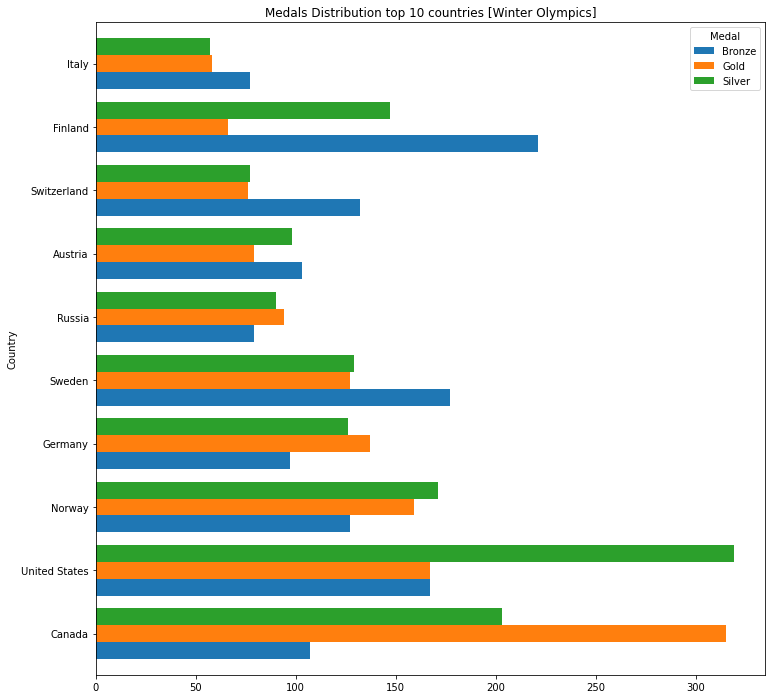

In [28]:
fig = top.plot.barh(width=0.8)
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title('Medals Distribution top 10 countries [Winter Olympics]')
plt.show()

#**Analyzing the Summer Data**

In [29]:
summer.rename(columns={'Country' : 'Code'}, inplace=True) # Rename the column country into code

In [30]:
summer = pd.merge(summer, dict, on='Code', how='outer')

In [31]:
summer.head()

,Year,City,Sport,Discipline,Athlete,Code,Gender,Event,Medal,Country,Population,GDP per Capita
0,1896.0,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,100M Freestyle,Gold,Hungary,9844686.0,12363.54346
1,1896.0,Athens,Aquatics,Swimming,"HAJOS, Alfred",HUN,Men,1200M Freestyle,Gold,Hungary,9844686.0,12363.54346
2,1896.0,Athens,Athletics,Athletics,"SZOKOLYI, Alajos",HUN,Men,100M,Bronze,Hungary,9844686.0,12363.54346
3,1896.0,Athens,Athletics,Athletics,"DANI, Nandor",HUN,Men,800M,Silver,Hungary,9844686.0,12363.54346
4,1896.0,Athens,Athletics,Athletics,"KELLNER, Gyula",HUN,Men,Marathon,Bronze,Hungary,9844686.0,12363.54346


In [32]:
summer.nunique()

Year                 27
City                 22
Sport                43
Discipline           67
Athlete           22762
Code                219
Gender                2
Event               666
Medal                 3
Country             201
Population          196
GDP per Capita      176
dtype: int64

In [33]:
summer.describe()

,Year,Population,GDP per Capita
count,31165.000000,2.576600e+04,25200.000000
mean,1970.482785,1.482346e+08,36746.158771
std,33.158416,2.669055e+08,19584.821782
min,1896.000000,1.022200e+04,277.068309
25%,1948.000000,1.138956e+07,16088.277587
50%,1980.000000,6.080208e+07,41313.313995
75%,2000.000000,1.440968e+08,56115.718426
max,2012.000000,1.371220e+09,101449.968168


#**Who won the most medals**

In [37]:
medals = summer.groupby(['Athlete', 'Medal'])['Sport'].count().reset_index().sort_values(by='Sport', ascending=False)

In [38]:
medals

,Athlete,Medal,Sport
18383,"PHELPS, Michael",Gold,18
13465,"LEWIS, Carl",Gold,9
17060,"NURMI, Paavo",Gold,9
22145,"SPITZ, Mark",Gold,9
13061,"LATYNINA, Larisa",Gold,9
...,...,...,...
9498,"HODGES, Laura",Bronze,1
9497,"HODGE, Percy",Gold,1
9496,"HODGE, Megan",Silver,1
9495,"HODGE, Daniel Allen",Silver,1


#**Medal Distribution in top 10 countries [Summer Olympics]:**

In [39]:
medals_country = summer.groupby(['Country', 'Medal'])['Gender'].count().reset_index().sort_values(by='Gender', ascending=False)

In [40]:
medals_country

,Country,Medal,Gender
283,United States,Gold,2235
284,United States,Silver,1252
282,United States,Bronze,1098
281,United Kingdom,Silver,621
279,United Kingdom,Bronze,553
...,...,...,...
264,Trinidad and Tobago,Gold,1
75,Ecuador,Gold,1
166,Luxembourg,Gold,1
132,Israel,Gold,1


In [41]:
medals_country = medals_country.pivot('Country', 'Medal', 'Gender').fillna(0)

In [42]:
medals_country

Medal,Bronze,Gold,Silver
Country,,,
Afghanistan,2.0,0.0,0.0
Algeria,8.0,5.0,2.0
Argentina,91.0,69.0,99.0
Armenia,8.0,1.0,2.0
Australia,472.0,312.0,405.0
...,...,...,...
Venezuela,8.0,2.0,2.0
Vietnam,0.0,0.0,2.0
Virgin Islands*,0.0,0.0,1.0


In [43]:
top = medals_country.sort_values(by='Gold', ascending=False)[:10]

In [44]:
top

Medal,Bronze,Gold,Silver
Country,,,
United States,1098.0,2235.0,1252.0
United Kingdom,553.0,546.0,621.0
Italy,404.0,476.0,416.0
Germany,475.0,452.0,378.0
Hungary,351.0,412.0,316.0
France,497.0,408.0,491.0
Sweden,328.0,349.0,367.0
Australia,472.0,312.0,405.0
China,221.0,290.0,296.0


###**Visulization the data**

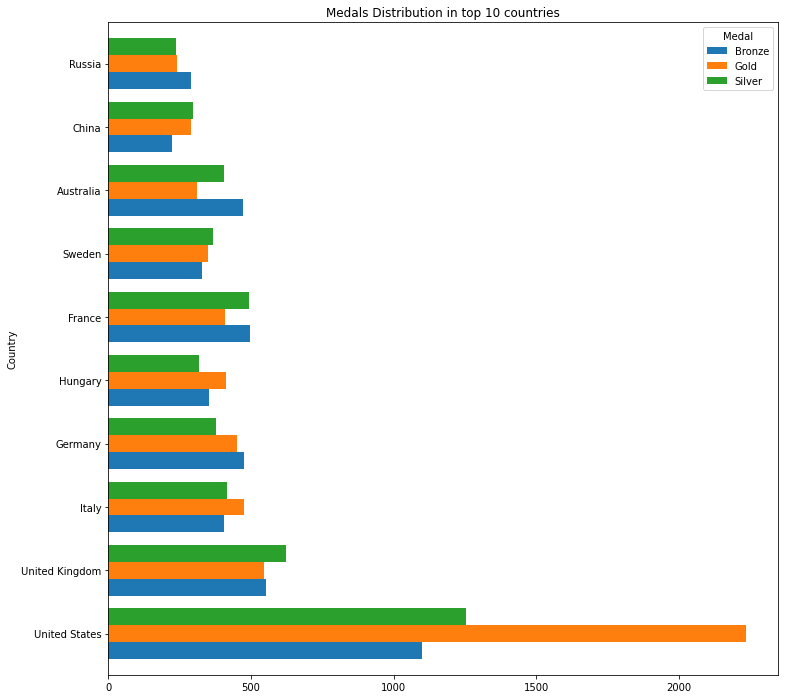

In [45]:
fig = top.plot.barh(width=0.8)
fig = plt.gcf()
fig.set_size_inches(12,12)
plt.title("Medals Distribution in top 10 countries")
plt.show()